In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
def load_images_from_tile():
    image_data = []
    folder_path="/home/gabriel/transfer_data/forest_aerial/Forest Segmented/Forest Segmented/images"
    for filename in sorted(os.listdir(folder_path)):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        img_gray = img.convert('L')
        img_array = np.array(img_gray)
        image_data.append(img_array)
    return np.stack(image_data, axis=0)

In [3]:
def load_masks_from_tile():
    image_data = []
    folder_path="/home/gabriel/transfer_data/forest_aerial/Forest Segmented/Forest Segmented/masks"
    for filename in sorted(os.listdir(folder_path)):
        image_path = os.path.join(folder_path, filename)
        img = Image.open(image_path)
        img_gray = img.convert('L')
        img_array = np.array(img_gray)

        condition0=(img_array<128)
        condition1=(img_array>128)

        img_array[condition0]=0
        img_array[condition1]=1



        image_data.append(img_array)
    return np.stack(image_data, axis=0)

In [5]:
img=load_images_from_tile()

masks=load_masks_from_tile()


5108
5108


In [7]:
print(img.shape)
print(masks.shape)

(5108, 256, 256)
(5108, 256, 256)


In [1]:
from utils.datapreparation_forest import forest_patches
train_image,train_label, test_image, test_label, val_image, val_label=forest_patches("/home/gabriel/transfer_data/forest_aerial/Forest Segmented/Forest Segmented",train=70, val=15, test=15)

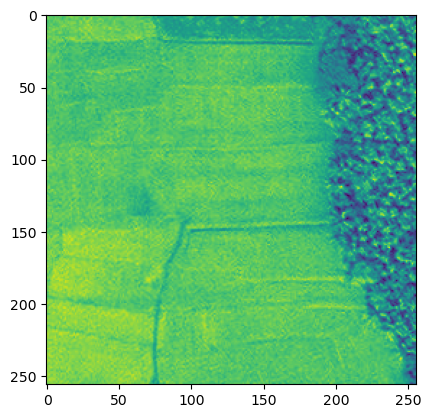

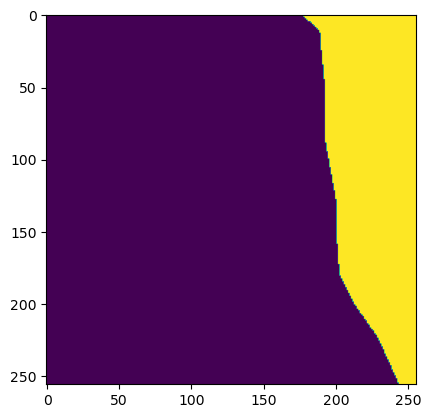

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_image[0])
plt.show()
plt.imshow(train_label[0])
plt.show()